#### Creating wordcloud
This project will help you to make wordcloud from your danish customers comments and this way understand  their most important and widespread needs. 

As an example of comments I will use Danish Poem, because customers data should not be published.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
import sys
import lemmy
from collections import Counter

In [2]:
# Load in the dataframe
# put the path to your file with reversed slashes, for example, my path is 
# C:\Data\Comments.xlsx
# I reverse all the slashes and insert path in the following code:
# df = pd.read_excel("C:/Data/comments.xlsx", encoding='latin1')
# I will use famous Danish Poem as an example
df = pd.read_excel("Danish Poem.xlsx", encoding='latin1')

In [3]:
# Lets take a look at the data, that we read the file correctly:
df.head(10)

,comment
0,"I Danmark er jeg født, der har jeg hjemme,"
1,"Der har jeg Rod, derfra min Verden gaaer."
2,"Du danske Sprog, Du er min Moders Stemme,"
3,Saa sødt velsignet Du mit Hjerte naaer.
4,"Du danske friske Strand,"
5,Hvor Oldtids Kjæmpegrave
6,"Staae mellem Æblegaard og Humlehave,"
7,"Dig elsker jeg! — Danmark, mit Fædreland!"
8,Hvor reder Sommeren vel Blomstersengen
9,"Meer rigt end her, ned til den aabne Strand?"


In [4]:
# Lets get rid of extra symbols in the comments:
def replace_symbols(string):
    '''
    function changes all symbols in a string to nothing
    '''
    for symbol in (',','?','!','.','&','/',')','(','"','\'',':',';','”','“','[',']','-','—','@','{','}','*','~','«','»'):
        string=string.replace(symbol,'')
    return string

df['new_comment'] = df['comment'].apply(lambda x: replace_symbols(x))

In [5]:
# Create an instance of the standalone lemmatizer.
lemmatizer = lemmy.load("da")

# get lemmas as a series
def lemms(line):
    '''
    Function get lemma of each word in a string and put in a series
    '''
    new_line=[]
    for word in line.split( ):
        lemma_word=lemmatizer.lemmatize("", word)
        new_line.append(lemma_word[0])
    return new_line

# Apply function and get lemmas
df['lemmas'] = df['new_comment'].apply(lambda x: lemms(x))

In [6]:
# take a look at the dataframe
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df[['comment','lemmas']]

,comment,lemmas
0,"I Danmark er jeg født, der har jeg hjemme,","[I, Danmark, være, jeg, føde, der, har, jeg, hjemme]"
1,"Der har jeg Rod, derfra min Verden gaaer.","[Dvære, har, jeg, Rod, derfra, jeg, Verden, gaaer]"
2,"Du danske Sprog, Du er min Moders Stemme,","[Du, dansk, Sprog, Du, være, jeg, Mode, Stemme]"
3,Saa sødt velsignet Du mit Hjerte naaer.,"[Saa, sød, velsigne, Du, jeg, Hjert, naaer]"
4,"Du danske friske Strand,","[Du, dansk, frisk, Strand]"
5,Hvor Oldtids Kjæmpegrave,"[Hvores, Oldtid, Kjæmpegrave]"
6,"Staae mellem Æblegaard og Humlehave,","[Staae, mellem, Æblegaard, og, Humlehave]"
7,"Dig elsker jeg! — Danmark, mit Fædreland!","[Dig, elske, jeg, Danmark, jeg, Fædreland]"
8,Hvor reder Sommeren vel Blomstersengen,"[Hvores, rede, Sommer, vel, Blomsterseng]"
9,"Meer rigt end her, ned til den aabne Strand?","[Me, rig, end, her, ned, til, den, aabne, Strand]"


In [7]:
# get the lemmas list to count frequency of each word
all_lemmas_list=df['lemmas'].values

flat_lemmas_list = []
for sublist in all_lemmas_list:
    for item in sublist:
        flat_lemmas_list.append(item) 
#make a dataframe with frequency results
freq = pd.DataFrame.from_dict(Counter(flat_lemmas_list), orient='index').reset_index()
freq = freq.rename(columns={'index':'word', 0:'frequency'})
freq.sort_values(by='frequency', ascending=False)

,word,frequency
3,jeg,21
13,Du,10
25,Hvores,6
33,Dig,6
35,Fædreland,5
1,Danmark,5
14,dansk,5
24,Strand,5
58,–,4
23,frisk,4


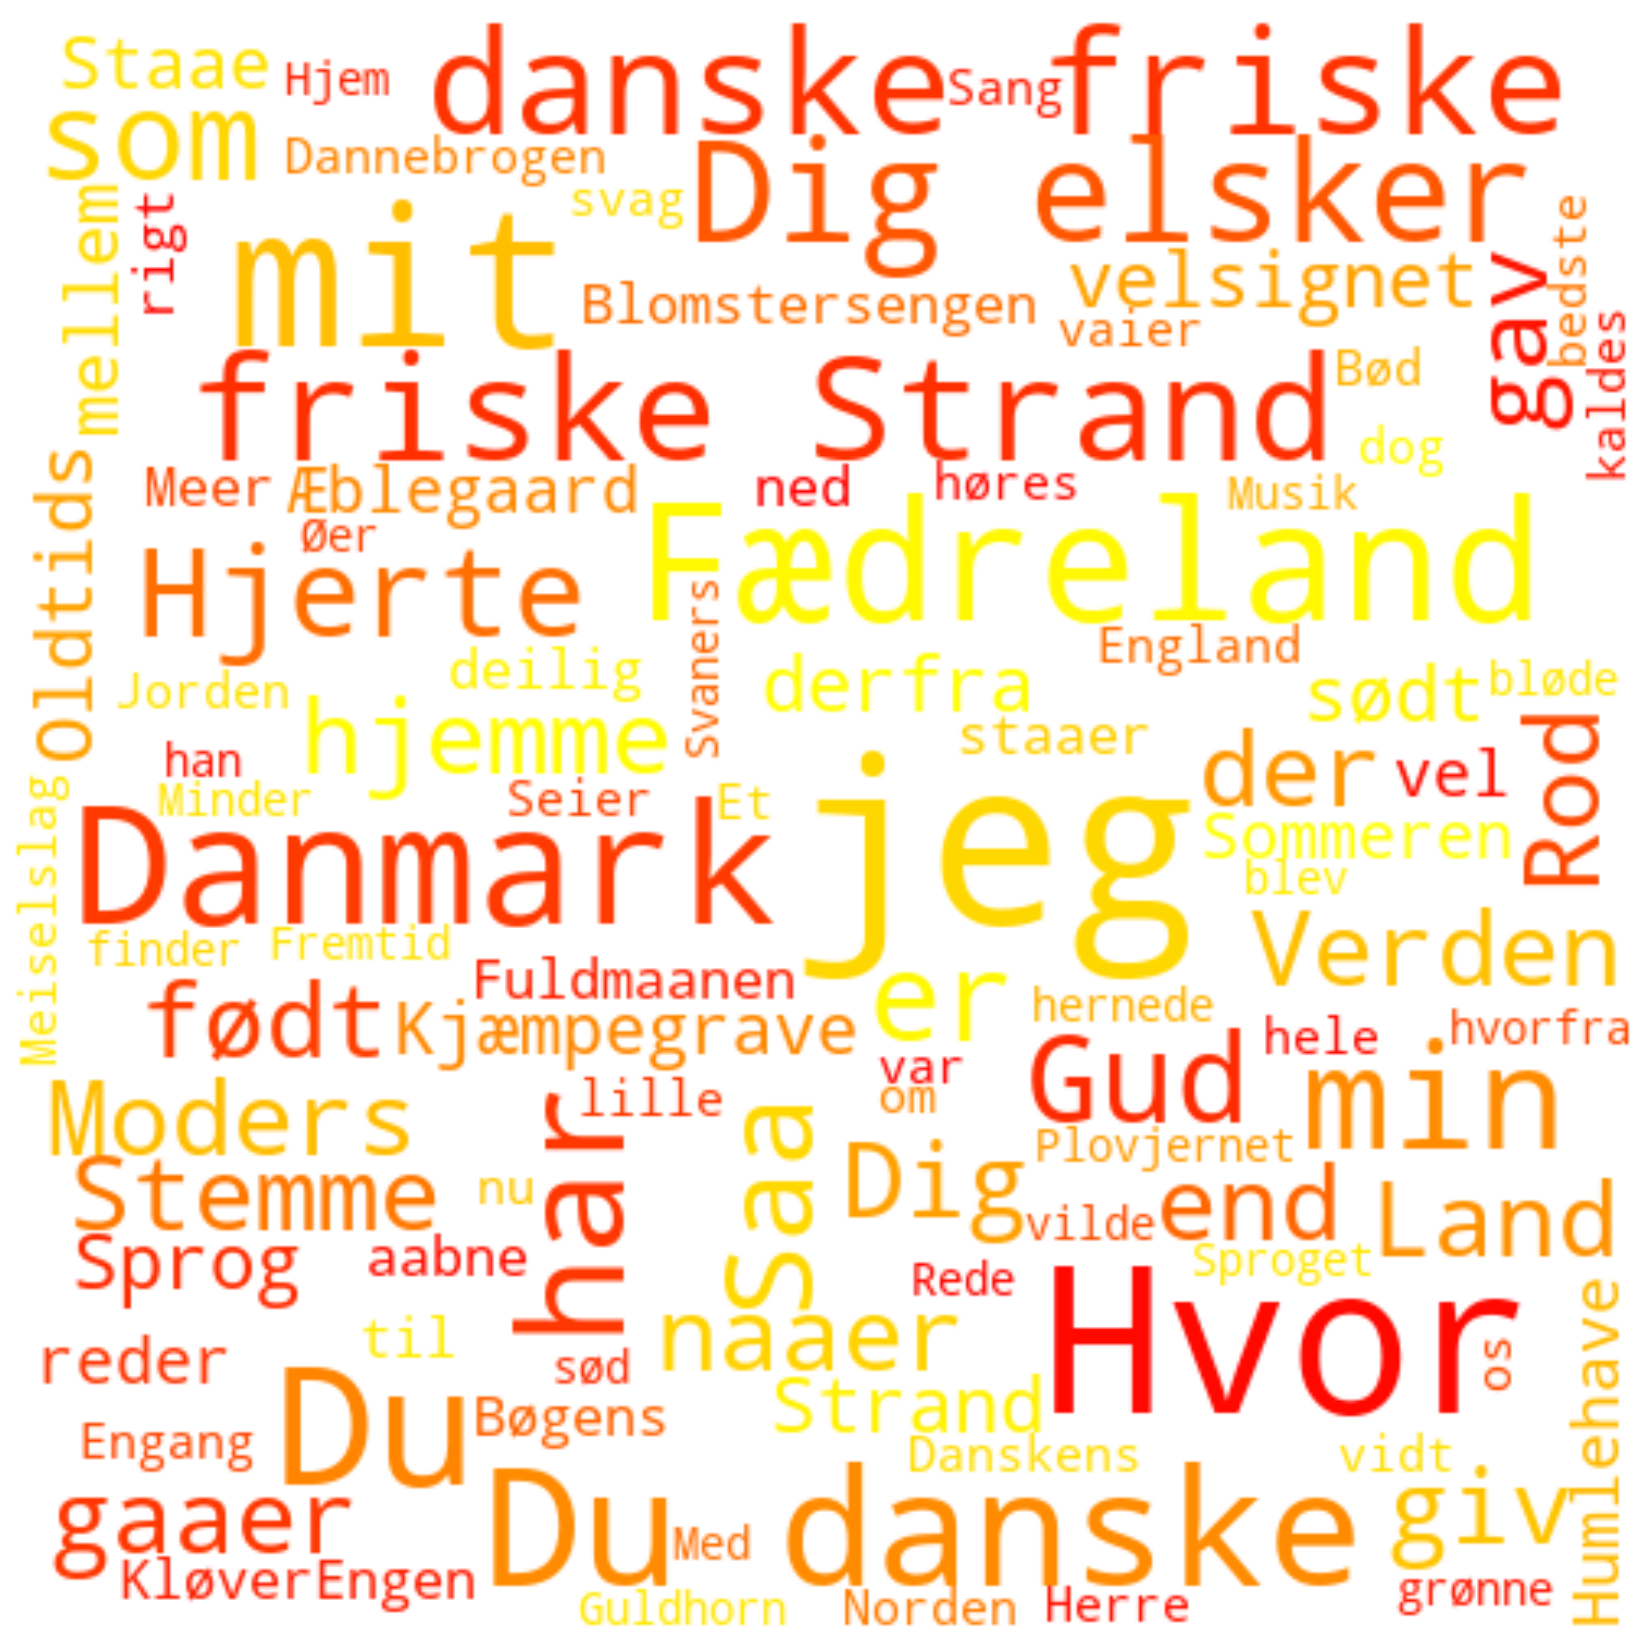

In [20]:
# get the wordcloud from lemmas using stopwords and mask, if you want
mask = np.array(Image.open("circle.png"))
text = " ".join(review for review in df.new_comment)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["og", "den", "en"])
# Generate a word cloud image
wordcloud = WordCloud(width=500,height=500, max_font_size=70, max_words=500, stopwords=stopwords, background_color="White", colormap='autumn').generate(text)
wordcloud.to_file("your_comments_in_wordcloud.png")
plt.figure(figsize=[40,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()